## NumPy入門

NumPyは数値演算に特化したPythonパッケージです。Pythonを利用しているほぼすべてのデータサイエンティストがNumPyを直接的（数値演算、行列演算など）・間接的（pandasやMatplotlibなどのライブラリ）に活用しています。従って、Pythonを利用して統計を学ぶうえで、NumPyの使い方を学ぶことは非常に重要です。本節ではNumPyで最も重要なデータ型 `ndarray` の基本となる操作方法や演算方法を解説します。

### ndarray型

`ndarray` 型は多次元の配列を扱うためのデータ型です。Python組込みのリスト型に似ていますが、次のような特徴があります。

- 配列内の要素はすべて同じデータ型である
- C言語やFORTRAN言語で実装されており、高速に演算できる
- 多次元の要素にアクセスするためのインデックスやメソッドが用意されている
- ブロードキャスト演算が行える
- ユニバーサル関数が適用できる

はじめにNumPyをインポートして `ndarray` オブジェクトを作成してみましょう。 `ndarray` オブジェクトを作成するには `array` クラスにリストやタプルなどを渡します。

In [1]:
import numpy as np

int_arr = np.array([1, 2])

オブジェクト内の要素はすべて同じデータ型であり、データ型を指定しない場合は自動的に判定されます。 `ndarray` オブジェクトの `dtype` 属性を参照するとデータ型が確認できます。

In [2]:
int_arr.dtype

dtype('int64')

`ndarray` 生成時にデータ型を明示する場合には、引数 `dtype` にデータ型を渡します。データ型の詳細は公式ドキュメント^1を参照してください。


^1 https://numpy.org/doc/stable/reference/generated/numpy.dtype.html

In [3]:
float_arr = np.array([1, 2], dtype=np.float32)

In [4]:
float_arr.dtype

dtype('float32')

型変換を行うには `astype` メソッドの引数にデータ型を渡します。

In [5]:
float_arr.astype(np.int)

array([1, 2])

##### note

本節では `ndarray` オブジェクトを便宜上「配列」と表記する場合があります。

### ndarrayオブジェクトの生成

NumPyでは形状（各次元の要素数）を指定したり、特定の値や乱数で埋めた `ndarray` オブジェクトを生成できます。本項では `ndarray` オブジェクトのさまざまな生成方法を紹介します。

`arange` 関数は指定した範囲の配列を生成します。基本的な使い方はPython組込みの `range` 関数と同様です。引数を1つ渡した場合には渡した値が要素数となり、0から自然数が連番で割り当てられます。

In [6]:
np.arange(3)

array([0, 1, 2])

第1引数に開始位置、第2引数に終了位置（第2引数の値は含まれない）を指定すると、指定した範囲で配列を生成します。また、第3引数に増分値を指定できます。 `range` 関数とは異なり、 `arange` 関数は小数値も扱えます。

In [7]:
np.arange(0, 2.5, 0.5)

array([0. , 0.5, 1. , 1.5, 2. ])

`zeros` 関数では指定した要素分の配列を0で埋めて生成します。

In [8]:
np.zeros(3)

array([0., 0., 0.])

`ones` 関数では1で埋めた配列を生成します。使い方は `zeros` 関数と同様です。要素数をリストやタプルで渡すと、多次元の配列を生成できます。次のコードでは2行2列の2次元配列を生成しています。

In [9]:
np.ones([2, 2])

array([[1., 1.],
       [1., 1.]])

`random` モジュールにはさまざまな乱数を生成する関数が用意されています。次のコードでは連続一様分布で生成した乱数から3行3列の配列を生成しています。

In [10]:
np.random.seed(1)
np.random.rand(3, 3)

array([[4.17022005e-01, 7.20324493e-01, 1.14374817e-04],
       [3.02332573e-01, 1.46755891e-01, 9.23385948e-02],
       [1.86260211e-01, 3.45560727e-01, 3.96767474e-01]])

##### note

`random.seed` 関数は乱数値を固定します。本節では紙面の出力結果を再現するために `seed` 関数を実行しています。

### 要素へのアクセス
`ndarray` オブジェクトはリスト型と同様に要素の参照や代入が行えます。インデックスが多次元のデータに対応しており、組込みのリスト型などと比較してより柔軟に扱えます。本項では次の2つの配列にアクセスします。

In [11]:
arr1 = np.arange(1, 4)
arr1

array([1, 2, 3])

`ndarray` オブジェクトの `reshape` メソッドでは配列の形状を変更できます。次のコードでは12個の要素を持つ1次元配列を4行3列の2次元配列に変換しています。

In [12]:
arr2 = np.arange(1, 13).reshape(4, 3)
arr2

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

要素を参照するには添字に位置を指定します。

In [13]:
arr1[0]

1

添字にはスライス記法が利用できます。次のコードでは2番目から3番目の位置の要素を参照しています。

In [14]:
arr1[1:3]

array([2, 3])

2次元の配列の場合、1次元の配列の各要素が1次元の配列をもつ構造になります。2次元の配列の位置を添字で指定すると、指定した位置の行が参照されます。

In [15]:
arr2[0]

array([1, 2, 3])

添字には各次元の位置をカンマで区切って指定できます。次のコードでは2行3列目の要素を参照できます。

In [16]:
arr2[1, 2]

6

特定の次元の要素をスライス記法で参照もできます。次のコードでは1行目2〜3列目の要素を参照しています。

In [17]:
arr2[0, 1:3]

array([2, 3])

リスト型と同様に添字に指定した位置に値を代入できます。

In [18]:
arr1[1] = 10
arr1

array([ 1, 10,  3])

In [19]:
arr2[1, :2] = 100
arr2

array([[  1,   2,   3],
       [100, 100,   6],
       [  7,   8,   9],
       [ 10,  11,  12]])

### ブロードキャスト

複数の要素を数値演算するケースを考えてみます。さまざまな方法がありますが、例としてPythonの組み込みのリストを次のコードのようにfor文で繰り返して処理する方法が挙げられます。

In [20]:
li = [1, 2, 3]
[x + 1 for x in li]

[2, 3, 4]

IPythonのマジックコマンド `%time` を利用するとコードの実行時間を容易に計測できます。次のコードでは引数に前のコードを渡し、実行時間を計測しています。1000000回試行した結果、筆者の実行環境では実行時間の平均がxxxナノ秒で標準偏差がxxナノ秒であることを示しています。

In [21]:
%timeit [x + 1 for x in li]

276 ns ± 10.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


このように、組込み型で数値演算を行うには冗長となり、処理速度にも課題があります。 `ndarray` オブジェクトではブロードキャスト演算が行えます。次のコードのように配列に対して演算子を利用した演算ができ、高速に処理できます。図xxはコード実行時のイメージです。

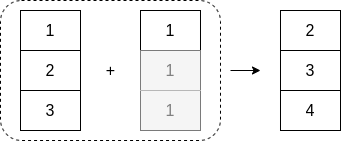

In [22]:
arr1 = np.array([1, 2, 3])
arr1 + 1

array([2, 3, 4])

In [23]:
%timeit arr1 + 1

1.3 µs ± 27.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


次のコードのように配列同士の演算も演算子が利用できます。図xxはコード実行時のイメージです。

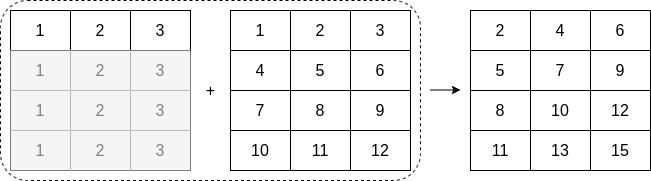

In [24]:
arr2 = np.arange(1, 13).reshape(4, 3)
arr2

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [25]:
arr1 + arr2

array([[ 2,  4,  6],
       [ 5,  7,  9],
       [ 8, 10, 12],
       [11, 13, 15]])

### 関数の適用

`ndarray` オブジェクトの全ての要素に対して関数を適用する仕組みがあります。このような関数をユニバーサル関数または略してufuncなどと表記されます^2。

^2: https://numpy.org/doc/stable/reference/ufuncs.html#math-operations

次のコードでは `power` 関数を利用して配列のべき乗を算出しています。

In [26]:
np.power(arr1, arr2)

array([[     1,      4,     27],
       [     1,     32,    729],
       [     1,    256,  19683],
       [     1,   2048, 531441]])

`ndarray` オブジェクトにはNumPyの関数のほか、組込み関数やユーザが作成した関数を適用できます。次のコードでは組込みの `abs` 関数を利用して絶対値を算出しています。この `abs` 関数のように単一の値（スカラ型）を引数とする関数を適用した場合には、それぞれの要素に対して関数が適用されます。

In [27]:
abs(np.array([1, -2, 3]))

array([1, 2, 3])

次の組込みの `sum` 関数のように複数の値（イテラブル）を引数とする関数を適用した場合には、すべてのデータに対して関数が適用されます。

In [28]:
sum(np.array([1, 2, 3]))

6

次のコードでは `my_func` という関数を作成し、配列に適用しています。

In [29]:
def my_func(x):
    return x ** 2 + 1


my_func(arr1)

array([ 2,  5, 10])